## Exploratory Data Analysis (EDA) - Bike Sharing Dataset
En este notebook se realiza el análisis exploratorio de la versión modificada del dataset "Bike Sharing Dataset".
El objetivo es comprender la estructura, calidad y relaciones entre variables, preparando los datos para modelado posterior.


### Importar librerías

In [1]:
#from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline as mpl
mpl.backend = "svg"
import os
import sys

### Importar dataset
Existen 3 formas de dataset:  
1. Desde dataset en el repositorio original
2. Desde datset en el repositorio modificado
3. Desde internet (se utiliza ucimlrepo, a veces da problemas con proxy)
4. Dataset online (bypass ucimlrepo)

In [2]:
## Seleccionar modo de importación:
## 1. Desde repositorio, original
## 2. Desde repositorio, modificado
## 3. Desde internet

dataset_selection=1

def load_dataset(dataset_selection):
    match dataset_selection:
        case 1:
            df=pd.read_csv('../data/raw/bike_sharing_original.csv')
            return df
        case 2:
            df=pd.read_csv('../data/raw/bike_sharing_modified.csv')
            return df
        case 3:
            # fetch dataset 
            bike_sharing = fetch_ucirepo(id=275) 
            
            # data (as pandas dataframes) 
            X = bike_sharing.data.features 
            y = bike_sharing.data.targets 
            
            # metadata 
            print(bike_sharing.metadata) 
            
            # variable information 
            print(bike_sharing.variables)
        case 4:
            url='https://archive.ics.uci.edu/static/public/275/data.csv'
            df=pd.read_csv(url)
            return df
        case _:
            return "Invalid option"  # Default case

df_orig=load_dataset(1)
df_mod=load_dataset(2)
df_online=load_dataset(4)

### Variable table
| Variable Name | Role     | Type         | Description                                                                                                           | Units | Missing Values |
|----------------|----------|--------------|-----------------------------------------------------------------------------------------------------------------------|--------|----------------|
| instant        | ID       | Integer      | record index                                                                                                          |        | no             |
| dteday         | Feature  | Date         | date                                                                                                                  |        | no             |
| season         | Feature  | Categorical  | 1:winter, 2:spring, 3:summer, 4:fall                                                                                  |        | no             |
| yr             | Feature  | Categorical  | year (0: 2011, 1: 2012)                                                                                               |        | no             |
| mnth           | Feature  | Categorical  | month (1 to 12)                                                                                                       |        | no             |
| hr             | Feature  | Categorical  | hour (0 to 23)                                                                                                        |        | no             |
| holiday        | Feature  | Binary       | weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)                               |        | no             |
| weekday        | Feature  | Categorical  | day of the week                                                                                                       |        | no             |
| workingday     | Feature  | Binary       | if day is neither weekend nor holiday is 1, otherwise is 0                                                            |        | no             |
| weathersit     | Feature  | Categorical  | 1: Clear, Few clouds, Partly cloudy, Partly cloudy                                                                    |        | no             |
| temp           | Feature  | Continuous   | Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (hourly)   | C      | no             |
| atemp          | Feature  | Continuous   | Normalized feeling temperature in Celsius. Derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (hourly)         | C      | no             |
| hum            | Feature  | Continuous   | Normalized humidity. The values are divided by 100 (max)                                                              |        | no             |
| windspeed      | Feature  | Continuous   | Normalized wind speed. The values are divided by 67 (max)                                                             |        | no             |
| casual         | Other    | Integer      | count of casual users                                                                                                 |        | no             |
| registered     | Other    | Integer      | count of registered users                                                                                             |        | no             |
| cnt            | Target   | Integer      | count of total rental bikes including both casual and registered                                                      |        | no             |


### Basado en lo explicado en la página de Datasets por equipo, se trabaja con el dataset modificado.

"Hemos generado una versión modificada del dataset para que realicen el ejercicio de Exporatory Data Analisys (EDA) y Limpieza de Datos del primer entregable colaborativo"

In [3]:
df_mod.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,mixed_type_col
0,1.0,2011-01-01,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0,3.0,13.0,16.0,702
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.8,0.0,8.0,32.0,40.0,831
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.8,0.0,5.0,27.0,32.0,175
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0,581
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0,659


In [4]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17726 entries, 0 to 17725
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   instant         17524 non-null  object
 1   dteday          17542 non-null  object
 2   season          17519 non-null  object
 3   yr              17515 non-null  object
 4   mnth            17515 non-null  object
 5   hr              17489 non-null  object
 6   holiday         17552 non-null  object
 7   weekday         17539 non-null  object
 8   workingday      17527 non-null  object
 9   weathersit      17526 non-null  object
 10  temp            17546 non-null  object
 11  atemp           17534 non-null  object
 12  hum             17512 non-null  object
 13  windspeed       17545 non-null  object
 14  casual          17523 non-null  object
 15  registered      17530 non-null  object
 16  cnt             17534 non-null  object
 17  mixed_type_col  15973 non-null  object
dtypes: obj

In [5]:
# Revisando cardinalidad de las variables, número de valores, su top y frecuencia
df_mod.describe().T

,count,unique,top,freq
instant,17524,17085,error,23
dteday,17542,1253,2012-03-30,26
season,17519,155,3.0,4243
yr,17515,128,1.0,8224
mnth,17515,190,7.0,1422
hr,17489,218,20.0,701
holiday,17552,101,0.0,16048
weekday,17539,168,6.0,2386
workingday,17527,119,1.0,11225
weathersit,17526,172,1.0,10809


Se verifica que no haya valores nulos cómo se menciona en la página origen del dataset.

In [6]:
# Revisando valores nulos en los datasets
df_orig.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
df_mod.isnull().sum().sort_values(ascending=False)

mixed_type_col    1753
hr                 237
hum                214
yr                 211
mnth               211
season             207
casual             203
instant            202
weathersit         200
workingday         199
registered         196
atemp              192
cnt                192
weekday            187
dteday             184
windspeed          181
temp               180
holiday            174
dtype: int64

In [8]:
missing_summary = pd.DataFrame({
    "column": df_mod.columns,
    "missing_count": df_mod.isnull().sum(),
    "missing_pct": round(df_mod.isnull().sum() / len(df_mod) * 100, 2)
}).sort_values("missing_pct", ascending=False)
missing_summary[missing_summary["missing_count"] > 0]

,column,missing_count,missing_pct
mixed_type_col,mixed_type_col,1753,9.89
hr,hr,237,1.34
hum,hum,214,1.21
yr,yr,211,1.19
mnth,mnth,211,1.19
season,season,207,1.17
casual,casual,203,1.15
instant,instant,202,1.14
weathersit,weathersit,200,1.13
workingday,workingday,199,1.12


In [9]:
df_mod[df_mod['mixed_type_col'].isnull()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,mixed_type_col
20,21.0,2011-01-01,1.0,0.0,1.0,20.0,0.0,6.0,0.0,2.0,0.4,0.4091,0.87,0.2537,11.0,25.0,36.0,NaN
31,32.0,2011-01-02,1.0,0.0,1.0,8.0,0.0,0.0,0.0,3.0,0.4,0.4091,0.71,0.2239,0.0,8.0,8.0,NaN
47,48.0,2011-01-03,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.22,0.197,0.44,0.3582,0.0,5.0,5.0,NaN
51,52.0,2011-01-03,1.0,0.0,1.0,6.0,0.0,1.0,1.0,1.0,0.14,0.1061,0.5,0.3881,0.0,30.0,30.0,NaN
56,57.0,2011-01-03,1.0,0.0,1.0,11.0,0.0,1.0,1.0,1.0,0.2,0.1818,0.4,0.3284,10.0,41.0,51.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17686,8533.0,2011-12-27,1.0,0.0,12.0,6.0,0.0,2.0,1.0,2.0,0.3,0.2727,0.61,0.2985,0.0,35.0,35.0,NaN
17693,2751.0,2011-04-29,2.0,0.0,4.0,12.0,0.0,5.0,1.0,1.0,0.56,0.5303,0.37,0.2836,63.0,160.0,223.0,NaN
17703,7990.0,2011-12-04,4.0,0.0,12.0,13.0,0.0,0.0,0.0,1.0,0.4,0.4091,0.66,NAN,88.0,269.0,357.0,NaN
17705,127.0,2011-01-06,1.0,0.0,1.0,12.0,0.0,4.0,1.0,1.0,0.26,NaN,error,0.0,6.0,78.0,84.0,NaN


In [10]:
df_mod[df_mod['mixed_type_col'].notnull()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,mixed_type_col
0,1.0,2011-01-01,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0,3.0,13.0,16.0,702
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.8,0.0,8.0,32.0,40.0,831
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.8,0.0,5.0,27.0,32.0,175
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0,581
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0,659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17721,13401.0,2012-07-17,3.0,1.0,7.0,13.0,0.0,2.0,1.0,1.0,0.92,0.8182,0.31,0.194,53.0,168.0,221.0,unknown
17722,17216.0,2012-12-25,1.0,1.0,12.0,4.0,1.0,2.0,0.0,2.0,0.24,0.2576,0.87,0.0896,0.0,1.0,1.0,27
17723,9341.0,2012-01-30,1.0,1.0,1.0,2.0,0.0,1.0,1.0,1.0,0.24,0.2121,0.48,0.3582,1.0,6.0,7.0,bad
17724,6268.0,2011-09-23,4.0,0.0,9.0,17.0,0.0,5.0,1.0,2.0,0.6,0.5,1.0,0.0,13.0,86.0,NaN,602


Se observan valores nulos en el dataset modificado, por lo que habrá que revisar los valores para identificar mecanismos de imputación.

In [11]:
# Revisando tipos de datos
df_orig.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [12]:
df_mod.dtypes

instant           object
dteday            object
season            object
yr                object
mnth              object
hr                object
holiday           object
weekday           object
workingday        object
weathersit        object
temp              object
atemp             object
hum               object
windspeed         object
casual            object
registered        object
cnt               object
mixed_type_col    object
dtype: object

Se verifican los tipos de datos de las variables y también se ven que están alteradas en el modificado.

In [13]:
# Revisando duplicados en los datasets
df_mod.duplicated().sum()

np.int64(0)

Debido a la alta cardinalidad en el df_mod que se piensa es debido a que todas las columnas están en tipo "objeto"
Se hará la conversión de tipado de los datos para poder analizar las distribuciones de forma correcta

In [19]:
# Creando copia del dataset modificado para la limpieza de tipado de datos
df_mod_clean = df_mod.copy()

In [20]:
# Elimina espacios y estandariza valores
df_mod_clean['dteday'] = df_mod_clean['dteday'].astype(str).str.strip()
# Reemplaza valores no válidos (como 'NAN', 'nan', 'error', etc.)
df_mod_clean['dteday'] = df_mod_clean['dteday'].replace(
    ['NAN', 'nan', 'NaN', 'error', 'unknown', ' '],
    pd.NA
)
# Convierte a date
df_mod_clean['dteday'] = pd.to_datetime(df_mod_clean['dteday'], errors='coerce').dt.date

# Convert integer columns
int_columns = ['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 
               'workingday', 'weathersit', 'casual', 'registered', 'cnt']

for col in int_columns:
    df_mod_clean[col] = pd.to_numeric(df_mod_clean[col], errors='coerce').astype('Int64')

# Convert float columns
float_columns = ['temp', 'atemp', 'hum', 'windspeed']

for col in float_columns:
    df_mod_clean[col] = pd.to_numeric(df_mod_clean[col], errors='coerce')

# Keep mixed_type_col as object since it contains mixed data types
print("Data types after conversion:")
print(df_mod_clean.dtypes)

Data types after conversion:
instant             Int64
dteday             object
season              Int64
yr                  Int64
mnth                Int64
hr                  Int64
holiday             Int64
weekday             Int64
workingday          Int64
weathersit          Int64
temp              float64
atemp             float64
hum               float64
windspeed         float64
casual              Int64
registered          Int64
cnt                 Int64
mixed_type_col     object
dtype: object


In [21]:
# Revisando cardinalidad de las variables categóricas
df_mod_clean.describe(include=['object', 'category']).T

,count,unique,top,freq
dteday,17531,731,2012-04-26,27
mixed_type_col,15973,1002,unknown,1768


In [22]:
# Revisando cardinalidad de las variables numéricas
df_mod_clean.describe(include=['number', 'float']).T

,count,mean,std,min,25%,50%,75%,max
instant,17453.0,10899.95697,43168.6351,1.0,4378.0,8730.0,13092.0,1585271.0
season,17462.0,5.435059,40.828996,1.0,2.0,3.0,4.0,985.0
yr,17452.0,3.104343,41.013759,0.0,0.0,1.0,1.0,1139.0
mnth,17444.0,10.905354,51.858621,1.0,4.0,7.0,10.0,1089.0
hr,17433.0,17.116388,67.641675,0.0,6.0,12.0,18.0,1955.0
holiday,17477.0,2.915374,43.483761,0.0,0.0,0.0,0.0,985.0
weekday,17480.0,7.089188,96.961092,0.0,1.0,3.0,5.0,11286.0
workingday,17464.0,3.182089,39.979501,0.0,0.0,1.0,1.0,971.0
weathersit,17460.0,4.972795,46.843781,1.0,1.0,1.0,2.0,989.0
temp,17490.0,3.575313,45.033474,0.02,0.34,0.5,0.66,999.46


Se ven datos máximos en las columnas numéricas sin sentido.

In [23]:
# Verificando distribuciones de las variables numéricas en el dataset original
df_orig.describe(include=['number', 'float']).T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


Se visualiza mayor cantidad de registros, lo que supone que en el dataset modificado se agregaron datos adicionales para el tratado.

## Búsqueda y tratamiento de outliers en df_mod

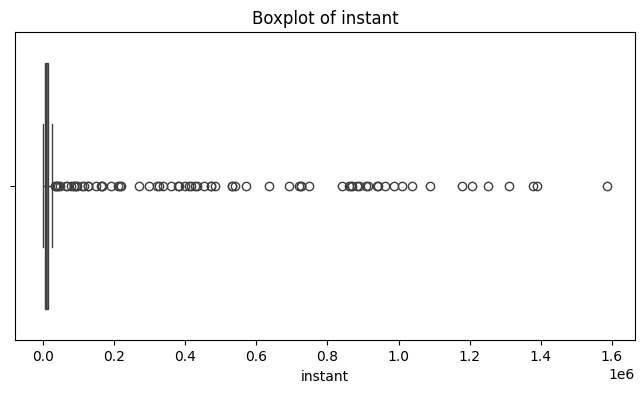

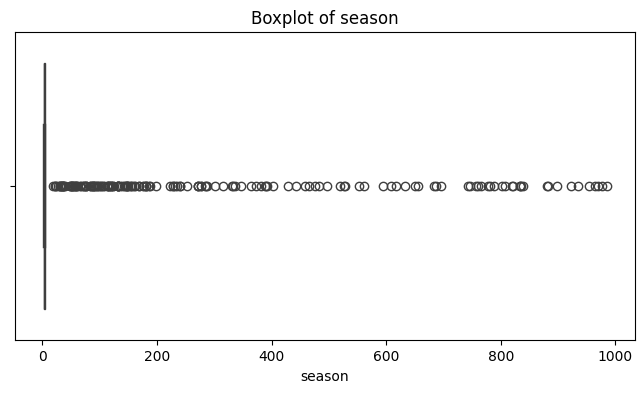

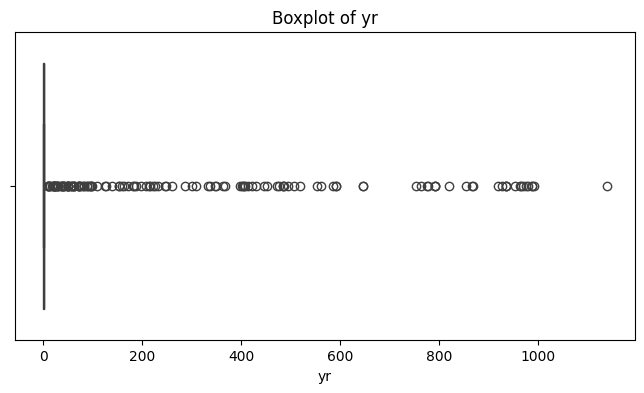

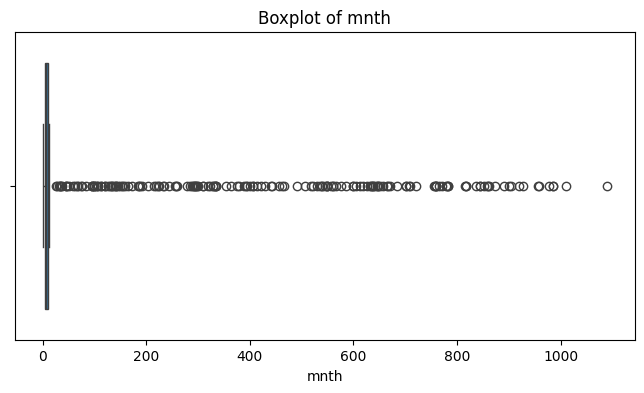

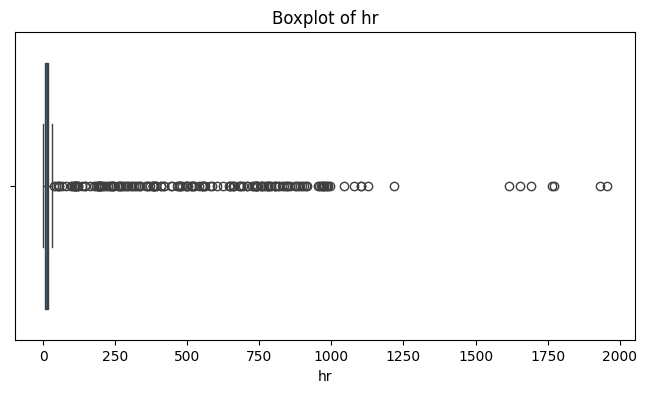

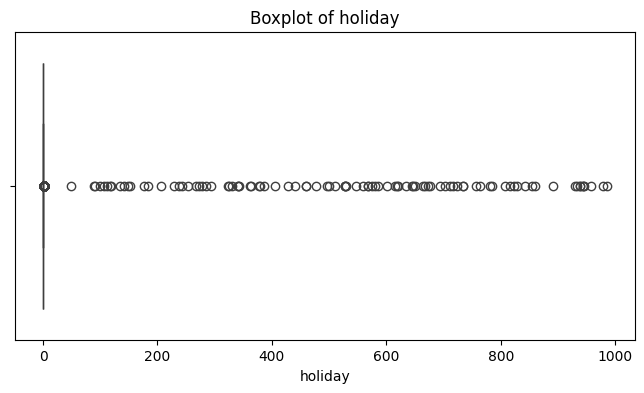

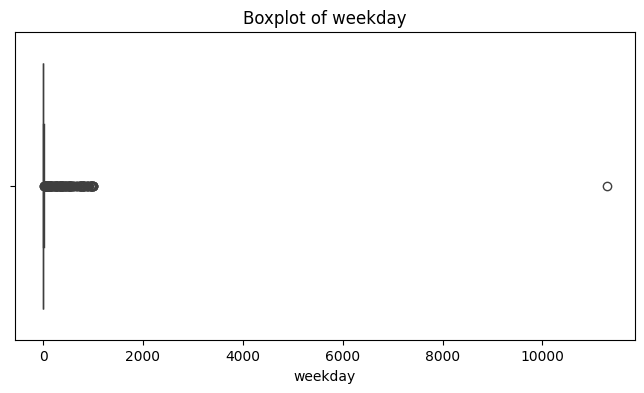

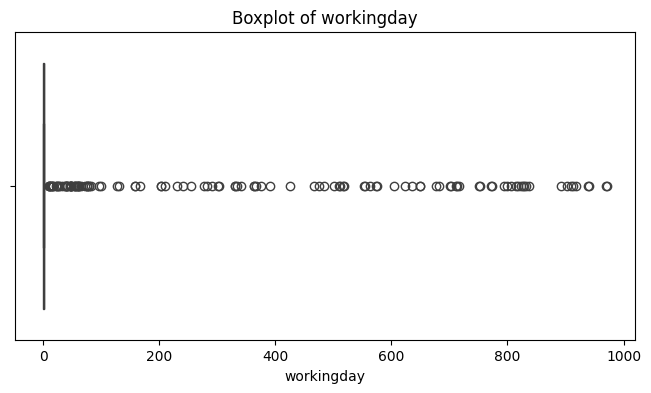

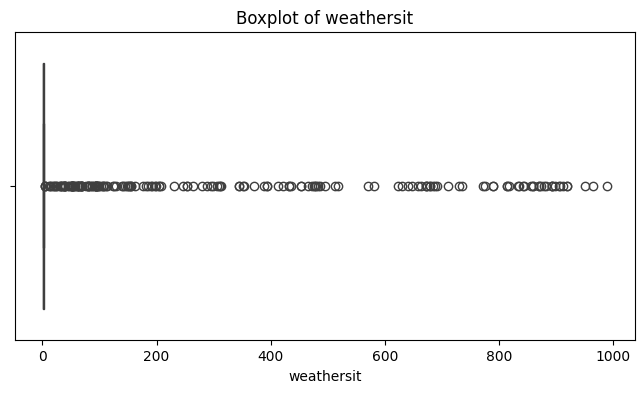

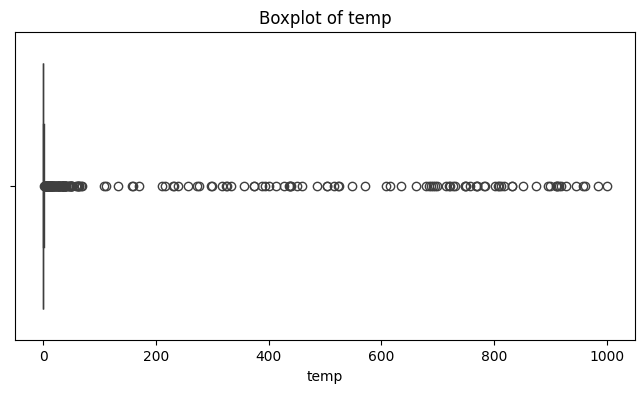

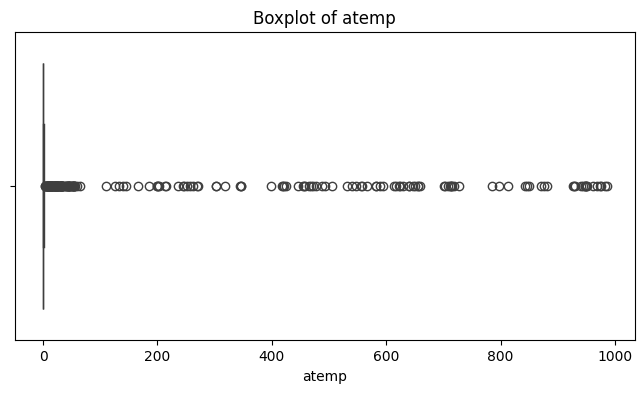

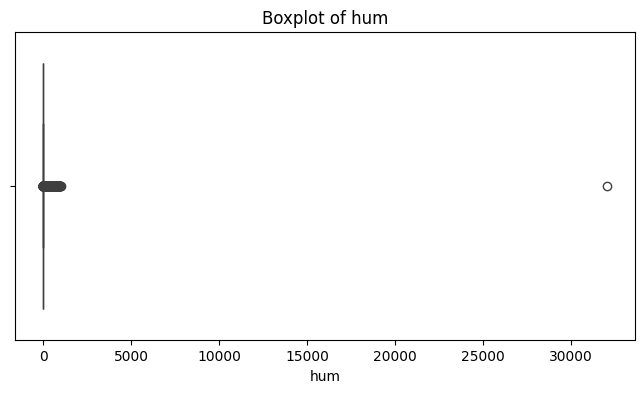

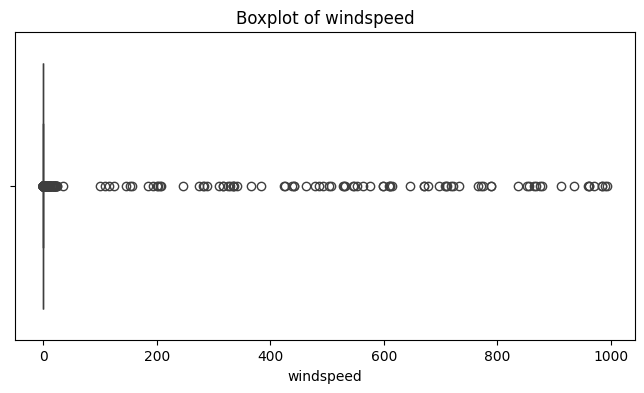

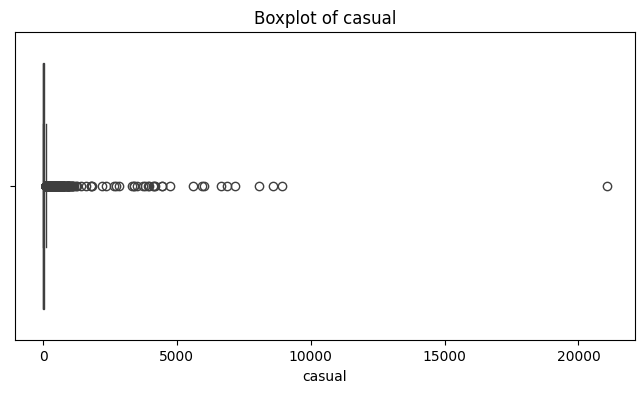

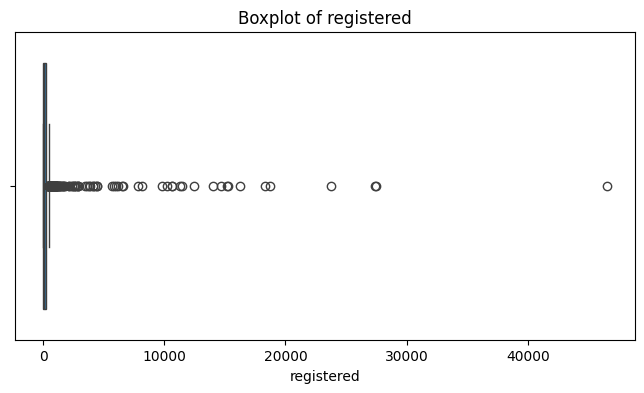

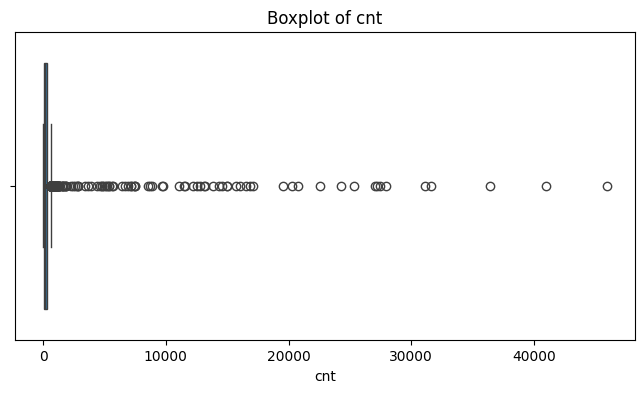

In [24]:
# Búsqueda y tratamiento de outliers en df_mod
numeric_cols = df_mod_clean.select_dtypes(include=['number']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_mod_clean[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [25]:
eliminar_outliers = True
if eliminar_outliers:
    for col in numeric_cols:
        # Calculate IQR
        Q1 = df_mod_clean[col].quantile(0.25)
        Q3 = df_mod_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Remove outliers
        df_mod_clean = df_mod_clean[(df_mod_clean[col] >= lower_bound) & (df_mod_clean[col] <= upper_bound)]

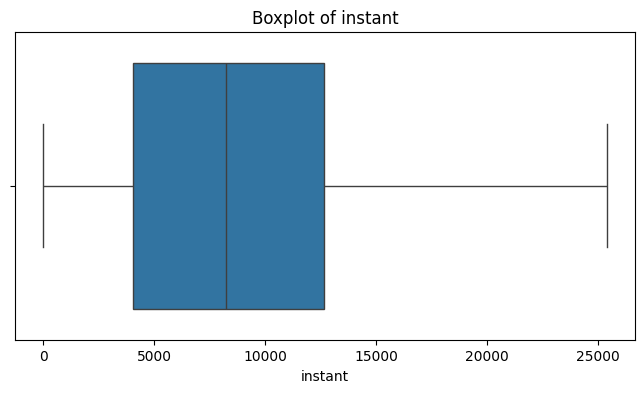

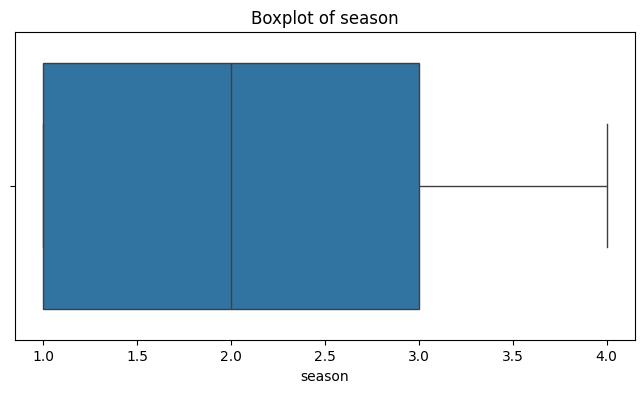

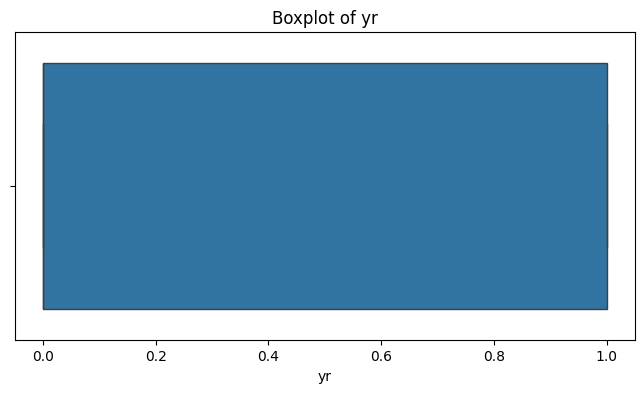

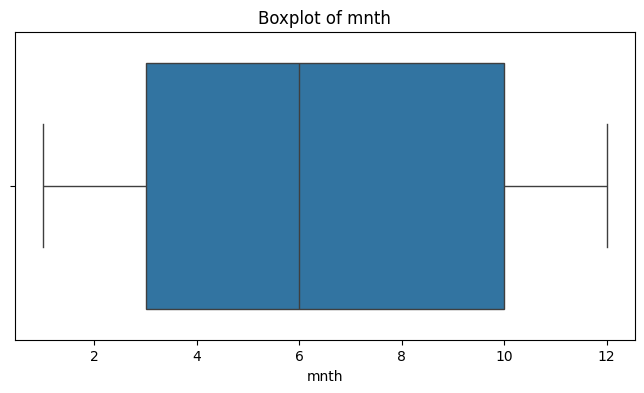

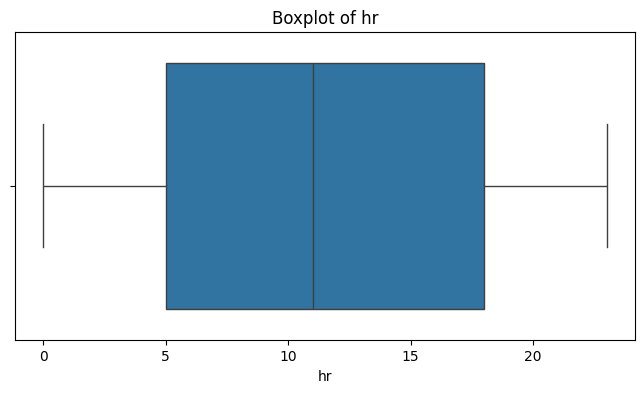

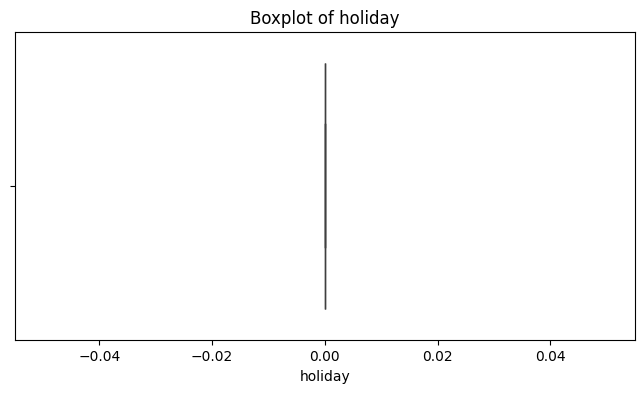

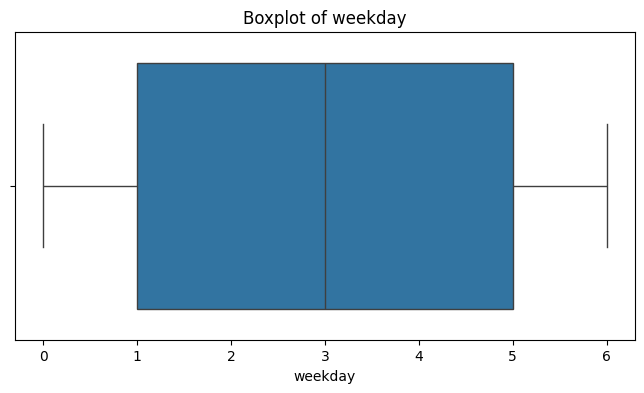

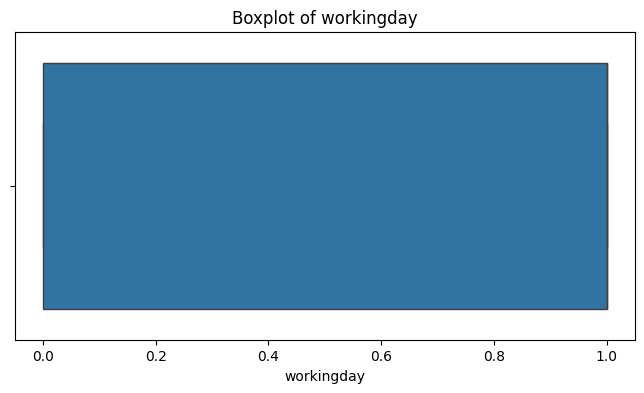

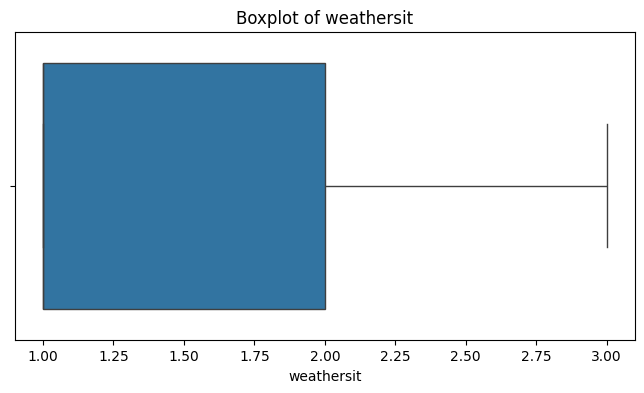

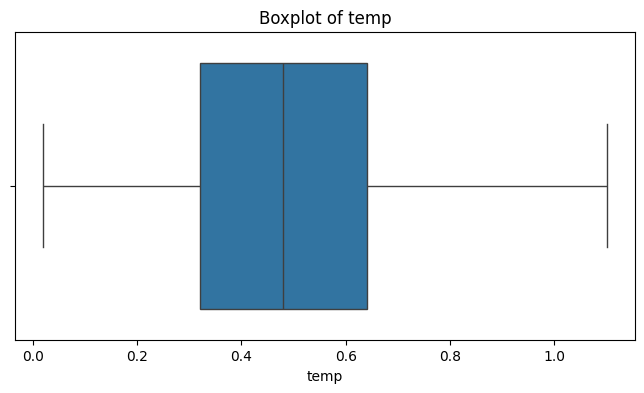

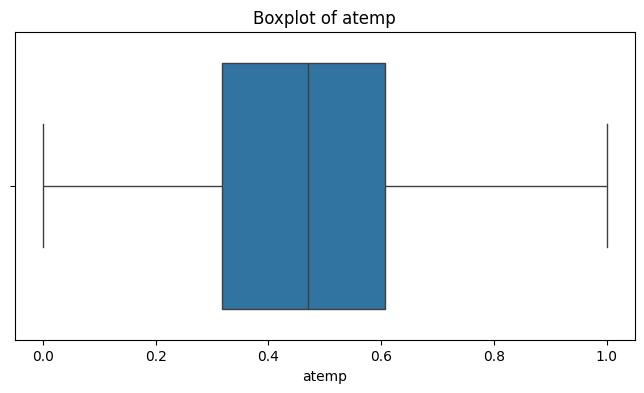

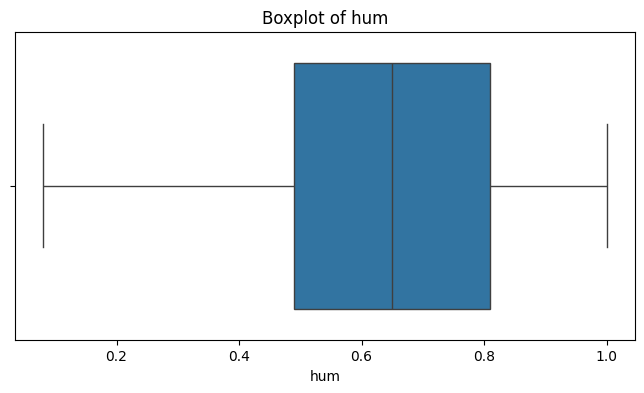

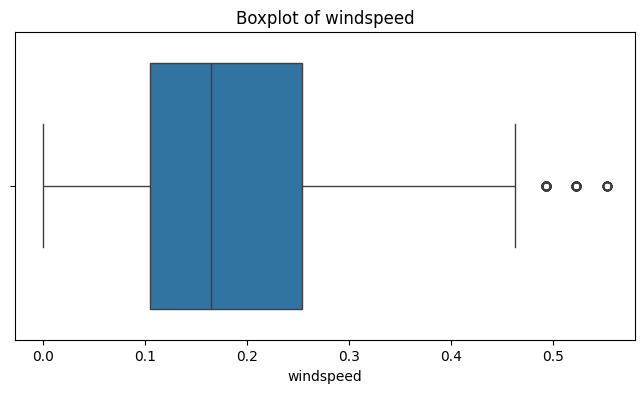

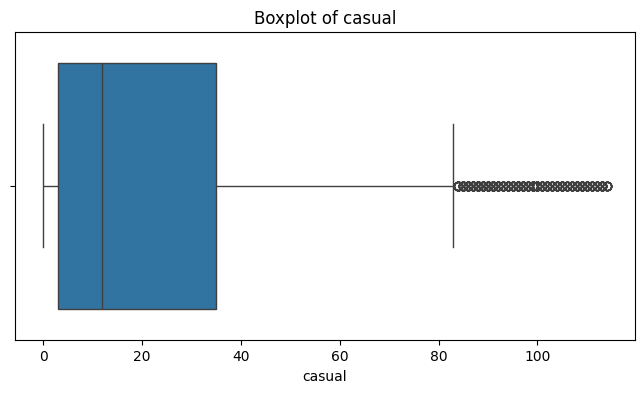

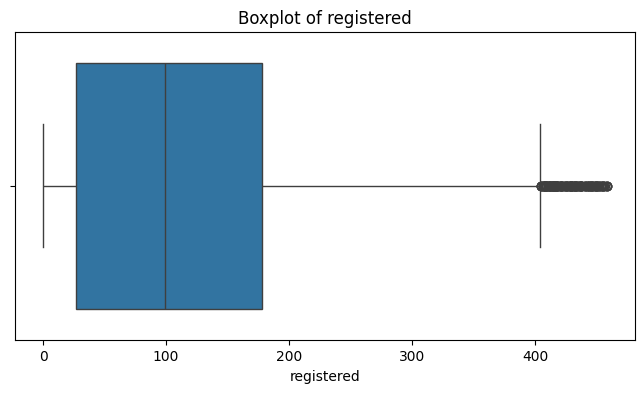

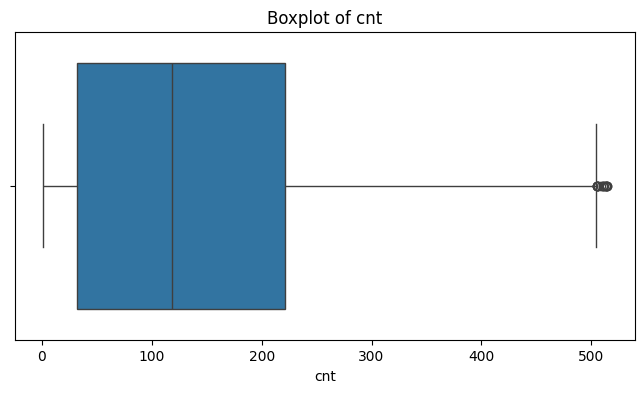

In [26]:
# Búsqueda y tratamiento de outliers en df_mod
numeric_cols = df_mod_clean.select_dtypes(include=['number']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_mod_clean[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
def plot_distribution(df_mod_clean, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df_mod_clean[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

for col in df_mod_clean.select_dtypes(include=['number', 'float']).columns:
    plot_distribution(df_mod_clean, col) 